Colab link: https://colab.research.google.com/drive/1XvfhWHDw5LhBbVLyQPYGN7Za4dd2Mnf1#scrollTo=-b4h2xyLL3nv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
import statsmodels.stats.api as sms

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
data.head(10)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


**Data cleaning**

In [ ]:
#Remove the columns related to search reason and object id
df = data.iloc[:, :-6]
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0


In [ ]:
#swap the yes and no of column Actions_at_arrest___Cooperative
df['Actions_at_arrest___Cooperative'] = df['Actions_at_arrest___Cooperative'].replace({0:1,1:0})
#Aggregate the adverse actions at arrest together
df['Total_adverse_actions']=df.iloc[:,-6:].sum(axis=1)
#Remove missing values
df=df.dropna()


**EDA-Data Visualization**

In [ ]:
df.describe(include='all')


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Total_adverse_actions
count,64615.000000,64615,6.461500e+04,6.461500e+04,64615.000000,64615,64615,64615,64615,64615,64615.000000,64615.000000,64615,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000,64615.000000
unique,NaN,4,NaN,NaN,NaN,8,3,9,3,18,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jan-Mar,NaN,NaN,NaN,White,M,Aged 25 to 34 years,Not a youth,XX,NaN,NaN,Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17388,NaN,NaN,NaN,27407,52106,20725,61603,29019,NaN,NaN,7724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020.512172,NaN,1.029991e+06,6.032400e+06,318601.913426,NaN,NaN,NaN,NaN,NaN,0.113457,0.524383,NaN,0.004101,0.044417,0.038474,0.033584,0.006392,0.550600,0.677567
std,0.499856,NaN,1.731938e+04,1.870613e+04,10813.930258,NaN,NaN,NaN,NaN,NaN,0.317153,0.499409,NaN,0.063910,0.206021,0.192339,0.180156,0.079693,0.497437,0.721316
min,2020.000000,NaN,1.000000e+06,6.000000e+06,300000.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,NaN,1.014988e+06,6.016200e+06,309219.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,NaN,1.029987e+06,6.032402e+06,318594.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2021.000000,NaN,1.044998e+06,6.048596e+06,327922.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


Text(0.5, 0, 'Perceived race')

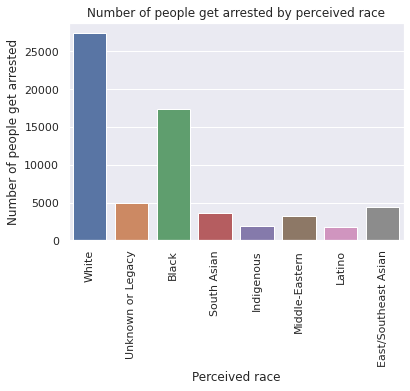

In [ ]:
# Create a bar chart using seaborn
sns.barplot(data=df, x='Perceived_Race', y='Total_adverse_actions',estimator=len)
# Rotate xlabel
plt.xticks(rotation=90)
# Add chart title and axis label
plt.title('Number of people get arrested by perceived race')
plt.ylabel('Number of people get arrested')
plt.xlabel('Perceived race')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Unknown or Legacy'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'South Asian'),
  Text(4, 0, 'Indigenous'),
  Text(5, 0, 'Middle-Eastern'),
  Text(6, 0, 'Latino'),
  Text(7, 0, 'East/Southeast Asian')])

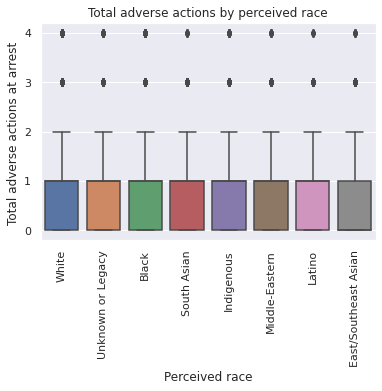

In [ ]:
# Create a box chart using seaborn
plt2 = sns.boxplot(x="Perceived_Race", y="Total_adverse_actions", data=df)
plt2.set_title('Total adverse actions by perceived race')
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Perceived race')
# Adjust font size
sns.set(font_scale = 1.2)
# Rotate xlabel
plt.xticks(rotation=90)


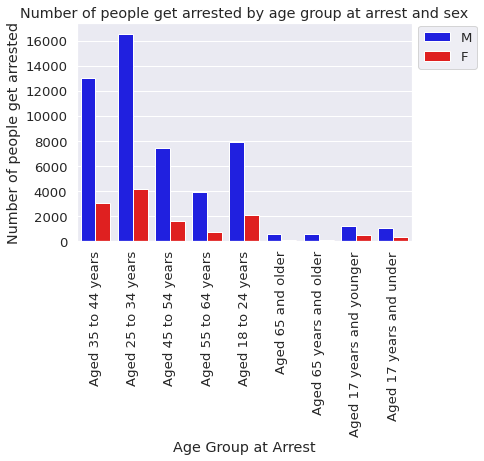

In [ ]:
# Filter the data 
df_filtered = df[df['Sex'] != 'U']
# create barplot using seaborn
plt3=sns.barplot(x='Age_group__at_arrest_', y='Total_adverse_actions', hue= 'Sex', data=df_filtered, palette=['blue', 'red'], estimator=len)
# set the legend
plt3.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Set the chart title and axis label 
plt.title('Number of people get arrested by age group at arrest and sex')
plt.ylabel('Number of people get arrested')
plt.xlabel('Age Group at Arrest')
# Rotate xlabel
plt.xticks(rotation=90)
# Adjust font size
sns.set(font_scale = 1.0)

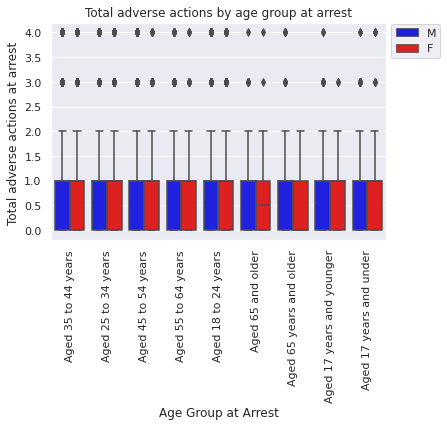

In [ ]:
# Filter the data 
df_filtered = df[df['Sex'] != 'U']
# create barplot using seaborn
plt4= sns.boxplot(x='Age_group__at_arrest_', y='Total_adverse_actions', hue='Sex', palette=['blue', 'red'], data=df_filtered)
# set the legend
plt4.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Rotate xlabel
plt.xticks(rotation=90)
# Set the chart title and asix label
plt.title("Total adverse actions by age group at arrest")
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Age Group at Arrest')
# Adjust font size
sns.set(font_scale = 1.0)

Text(0.5, 0, 'Youth at arrest under 18 years')

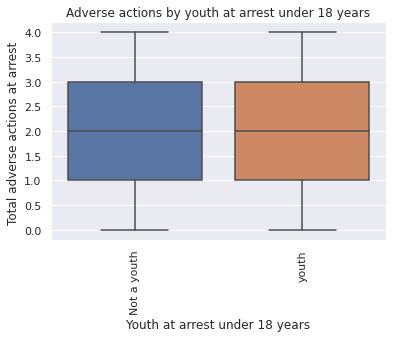

In [ ]:
# Group data by age group
df_grouped = df.groupby(['Youth_at_arrest__under_18_years', 'Total_adverse_actions']).size().reset_index(name='count')
# Replace 'Youth (aged 17 years and under)' with 'Youth (aged 17 and younger)', and rename new group as youth
df_grouped['Youth_at_arrest__under_18_years'] = df_grouped['Youth_at_arrest__under_18_years'].replace(['Youth (aged 17 years and under)', 'Youth (aged 17 and younger)'],'youth')
# Plot boxplot
plt5= sns.boxplot(x='Youth_at_arrest__under_18_years', y='Total_adverse_actions', data= df_grouped)
# Rotate xlabel
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Adverse actions by youth at arrest under 18 years')
plt.ylabel('Total adverse actions at arrest ')
plt.xlabel('Youth at arrest under 18 years')



**T-test 1: Sex and adverse actions at arrest**

In [ ]:
def welch_dof(x, y): 
    '''
    Takes in outcome values for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [ ]:
df['Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

In [ ]:
#create sex groups from dataset 
sex_F = df[df['Sex']=='F']
sex_M = df[df['Sex']=='M']

#get number of rows of each sub-dataset
print(sex_F.shape[0])
print(sex_M.shape[0])

taa_F = sex_F['Total_adverse_actions']
taa_M = sex_M['Total_adverse_actions']

#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_F, taa_M, equal_var=False)) #p value is significant

12500
52106
Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=3.147227611937536, pvalue=0.001650833116985814)


In [ ]:
#calculate mean and standard deviation of groups 
#Female suspects show higher mean total adverse actions at arrest 
print('Mean total adverse actions at arrest, Female, Male:',taa_F.mean(), taa_M.mean())
print('Standard deviation for total adverse actions at arrest, Female, Male:',taa_F.std(), taa_M.std())

Mean total adverse actions at arrest, Female, Male: 0.69584 0.6731278547576095
Standard deviation for total adverse actions at arrest, Female, Male: 0.7256506183457659 0.7201530083801411


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(taa_F), sms.DescrStatsW(taa_M))
print('Confidence interval for total adverse actions at arrest:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for total adverse actions at arrest: (0.008567046580899382, 0.03685724390388165)


In [ ]:
#welch dof 
print('DOF for total adverse actions at arrest:',welch_dof(taa_F, taa_M))

DOF for total adverse actions at arrest: 18850.71265891232


In [ ]:
#Create table
import pandas as pd
datatest1 = pd.DataFrame({'statistic': 3.147227611937536, 'pvalue': 0.001650833116985814, 'Mean F': 0.69584 , 'Mean M': 0.6731278547576095, 'sd F': 0.7256506183457659, 'sd M': 0.7201530083801411,
                          'CI': '(0.008567046580899382, 0.03685724390388165)', 'DOF': 18850.71265891232}, index=[0])


print(datatest1)

   statistic    pvalue   Mean F    Mean M      sd F      sd M  \
0   3.147228  0.001651  0.69584  0.673128  0.725651  0.720153   

                                            CI           DOF  
0  (0.008567046580899382, 0.03685724390388165)  18850.712659  


**T-test 2: Age(Youth) and adverse actions at arrest**

In [ ]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [ ]:
#create age groups from dataset 
youth_y = df[df['Youth_at_arrest__under_18_years'].isin(['Youth (aged 17 and younger)' , 'Youth (aged 17 years and under)'])]
youth_n = df[df['Youth_at_arrest__under_18_years']=='Not a youth']

#get number of rows of each sub-dataset
print(youth_y.shape[0])
print(youth_n.shape[0])

taa_y = youth_y['Total_adverse_actions']
taa_n = youth_n['Total_adverse_actions']

#conduct ttest
print('Ttest results for total adverse actions at arrest:',stats.ttest_ind(taa_y, taa_n, equal_var=False)) #p value is significant

3012
61603
Ttest results for total adverse actions at arrest: Ttest_indResult(statistic=-6.646632192508723, pvalue=3.4778796282425664e-11)


In [ ]:
#calculate mean and standard deviation of groups 
#Youth suspects show higher mean total adverse actions at arrest 
print('Mean total adverse actions at arrest, Youth, Adult:',taa_y.mean(), taa_n.mean())
print('Standard deviation for total adverse actions at arrest, Youth, Adult:',taa_y.std(), taa_n.std())

Mean total adverse actions at arrest, Youth, Adult: 0.602257636122178 0.6812492898073146
Standard deviation for total adverse actions at arrest, Youth, Adult: 0.6322204043522315 0.7251954420602996


In [ ]:
# compute confidence interval 
cm = sms.CompareMeans(sms.DescrStatsW(taa_y), sms.DescrStatsW(taa_n))
print('Confidence interval for total adverse actions at arrest:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for total adverse actions at arrest: (-0.10229304318502694, -0.05569026418524628)


In [ ]:
import pandas as pd
datatest2 = pd.DataFrame({'statistic': -6.646632192508723, 'pvalue': 3.4778796282425664e-11, 'Mean Y': 0.602257636122178, 'Mean A': 0.6812492898073146, 'sd Y': 0.6322204043522315, 'sd A': 0.7251954420602996,'CI': '(-0.10229304318502694, -0.05569026418524628)'}, index=[0])


print(datatest2)

   statistic        pvalue    Mean Y    Mean A     sd Y      sd A  \
0  -6.646632  3.477880e-11  0.602258  0.681249  0.63222  0.725195   

                                             CI  
0  (-0.10229304318502694, -0.05569026418524628)  


**One way ANOVA - Race & total adverse actions at arrest**

In [ ]:
df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [ ]:
#separate into different racial groups
taa_W = df[df['Perceived_Race'] == 'White']['Total_adverse_actions']
taa_B = df[df['Perceived_Race'] == 'Black']['Total_adverse_actions']
taa_Asia = df[df['Perceived_Race'].isin(['South Asian' , 'East/Southeast Asian'])]['Total_adverse_actions']
taa_Other = df[df['Perceived_Race'].isin(['Middle-Eastern' , 'Latino', 'Indigenous'])]['Total_adverse_actions']

In [ ]:
#Create a new df for this ANOVA
df_without_UnknownOrLegacy = df[df['Perceived_Race'] != 'Unknown or Legacy']
dfANOVA1 = df_without_UnknownOrLegacy.replace({'Perceived_Race' : { 'South Asian' : 'Asian', 'East/Southeast Asian': 'Asian', 'Indigenous' : 'Other', 'Middle-Eastern' : 'Other', 'Latino': 'Other' }})
dfANOVA1.shape[0]

59613

In [ ]:
from scipy.stats import f_oneway

# One-way ANOVA
statistic1, pvalue1 = f_oneway(taa_W, taa_Asia, taa_B, taa_Other)

print(f'One-way ANOVA: s = {statistic1}, p = {pvalue1}')

One-way ANOVA: s = 52.26377561222336, p = 9.992511720477068e-34


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1 = ols('Total_adverse_actions ~ C(Perceived_Race)', data=dfANOVA1).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Perceived_Race),82.378001,3.0,52.263776,9.992512e-34
Residual,31318.507041,59609.0,NaN,NaN


In [ ]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


p_rounded1 = round_p_value(pvalue1)
significance1 = get_significance(pvalue1)
print(f'The p-value is {p_rounded1} ({significance1})')

The p-value is <0.001 (***)


In [ ]:
#1 way anova with tukey hsd
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dfANOVA1['Total_adverse_actions'],
                          groups=dfANOVA1['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 Asian  Black   0.1224 0.001  0.0972  0.1476   True
 Asian  Other   0.0833 0.001  0.0526  0.1139   True
 Asian  White   0.0895 0.001  0.0658  0.1132   True
 Black  Other  -0.0391 0.001 -0.0656 -0.0126   True
 Black  White  -0.0329 0.001  -0.051 -0.0148   True
 Other  White   0.0062   0.9 -0.0189  0.0313  False
---------------------------------------------------


**Two-way ANOVA - Gender, Age & total adverse actions at arrest**

In [ ]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [ ]:
#Create a new df for this 2 way ANOVA
df_2_way_prep = df[df['Sex'] != 'U']
dfANOVA2 = df_2_way_prep.replace({'Youth_at_arrest__under_18_years' : { 'Youth (aged 17 and younger)' : 'Youth', 'Youth (aged 17 years and under)': 'Youth', 'Not a youth' : 'Adult'}})
dfANOVA2.shape[0]

64606

In [ ]:
#perform two-way ANOVA
model2 = ols('Total_adverse_actions ~ C(Sex) + C(Youth_at_arrest__under_18_years) + C(Sex):C(Youth_at_arrest__under_18_years)', data=dfANOVA2).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),5.749983,1.0,11.060177,8.825084e-04
C(Youth_at_arrest__under_18_years),18.446134,1.0,35.481411,2.588235e-09
C(Sex):C(Youth_at_arrest__under_18_years),0.457811,1.0,0.880606,3.480392e-01
Residual,33585.393357,64602.0,NaN,NaN


In [ ]:
########################????????????????????????post hoc test for main effect need or not?????????????????????????????

In [ ]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# dfANOVA2['combination'] = dfANOVA2.Sex + " / " + dfANOVA2.Youth_at_arrest__under_18_years

# # perform multiple pairwise comparison (Tukey HSD)
# m_comp = pairwise_tukeyhsd(endog=dfANOVA2['Total_adverse_actions'], groups=dfANOVA2['combination'], alpha=0.05)
# print(m_comp)

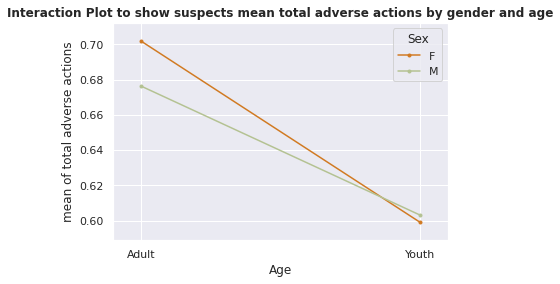

In [ ]:
#interaction plots in 2 way anova
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=dfANOVA2['Youth_at_arrest__under_18_years'], trace=dfANOVA2['Sex'], response=dfANOVA2['Total_adverse_actions'], 
    colors=['#d17a22', '#b4c292'], xlabel = 'Age', ylabel = 'total adverse actions')
plt.title('Interaction Plot to show suspects mean total adverse actions by gender and age', fontweight='bold')
plt.show()